Submitted By: Salina Gurung

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score


Part 1: Regression Task (California Housing)

In [ ]:
#Download dataset from KaggleHub (teacher method)
import kagglehub

path = kagglehub.dataset_download("camnugent/california-housing-prices")
print("Path to dataset files:",path)

Using Colab cache for faster access to the 'california-housing-prices' dataset.
Path to dataset files: /kaggle/input/california-housing-prices


In [ ]:
#Load CSV file
import os

housing_data_path = os.path.join(path, "housing.csv")
df = pd.read_csv(housing_data_path)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#Handle missing values
print("Missing values per column:\n", df.isna().sum())
df = df.dropna()
print("nAfter dropna, shape:", df.shape)

df.head()

Missing values per column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
nAfter dropna, shape: (20433, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#Seprate features (x) and target (y)
X = df.drop("median_house_value", axis=1)
Y = df["median_house_value"]

print("X shape:", X.shape)
print("Y shape:", Y.shape)
X.head()

X shape: (20433, 9)
Y shape: (20433,)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [ ]:
#Encode categorical column (ocean_proximity)
X = pd.get_dummies(X, columns=["ocean_proximity"])
print("After encoding, X shape:", X.shape)
X.head()

After encoding, X shape: (20433, 13)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False


In [ ]:
#Train/test split (80/20)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

print("Train:", X_train.shape, Y_train.shape)
print("Test:", X_test.shape, Y_test.shape)

Train: (16346, 13) (16346,)
Test: (4087, 13) (4087,)


In [ ]:
#Feature scaling (important for Ridge/Lasso)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled train shape:", X_train_scaled.shape)
print("Scaled test shape:", X_test_scaled.shape)

Scaled train shape: (16346, 13)
Scaled test shape: (4087, 13)


Task 2

Step 1: Baseline Model (No Regularization)

In [ ]:
#Baseline Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, Y_train)

Y_pred_train = lin_reg.predict(X_train_scaled)
Y_pred_test = lin_reg.predict(X_test_scaled)

train_mse = mean_squared_error(Y_train, Y_pred_train)
test_mse = mean_squared_error(Y_test, Y_pred_test)

print("Baseline Liner Regression ")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

print("\nFirst 10 coefficients:")
print(np.round(lin_reg.coef_[:10],4))

Baseline Liner Regression 
Train MSE: 4690511174.839978
Test MSE: 4802173538.604161

First 10 coefficients:
[-54375.7065 -54808.0362  13600.0883 -13613.1026  42999.8529 -41119.0676
  16307.3412  74538.7382   6398.3313 -12248.0666]


Step 2: Hyperparameter Tuning (Ridge + Lasso

In [ ]:
#Ridge GridSearchCV
alpha_grid = np.logspace(-4, 3, 20)

ridge = Ridge()
ridge_params = {'alpha': alpha_grid}

ridge_gs = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_gs.fit(X_train_scaled, Y_train)

print("Best Ridge alpha:", ridge_gs.best_params_['alpha'])
print("Best CV MSE:", -ridge_gs.best_score_)

Best Ridge alpha: 33.59818286283781
Best CV MSE: 4731765740.349899


In [ ]:
#Evaluate best Ridge on Train/Test
best_ridge = ridge_gs.best_estimator_

Y_pred_train = best_ridge.predict(X_train_scaled)
Y_pred_test = best_ridge.predict(X_test_scaled)

print("Best Ridge Results")
print("Train MSE:", mean_squared_error(Y_train, Y_pred_train))
print("Test MSE:", mean_squared_error(Y_test, Y_pred_test))

print("First 10 Ridge coefficients:")
print(np.round(best_ridge.coef_[:10], 4))


Best Ridge Results
Train MSE: 4691548510.093345
Test MSE: 4803558613.399168
First 10 Ridge coefficients:
[-50744.6354 -51026.475   13626.8227 -12456.0998  40265.6447 -40714.8898
  17565.3506  74207.0831   6685.1465 -13060.0755]


In [ ]:
# Lasso GridSearchCV
lasso = Lasso(max_iter=20000)
lasso_params = {"alpha": alpha_grid}

lasso_gs = GridSearchCV(
    lasso,lasso_params,cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

lasso_gs.fit(X_train_scaled, Y_train)

print("Best Lasso alpha:", lasso_gs.best_params_["alpha"])
print("Best CV MSE:", -lasso_gs.best_score_)

Best Lasso alpha: 78.47599703514607
Best CV MSE: 4732185109.850247


In [ ]:
# Evaluate best Lasso on Train/Test
best_lasso = lasso_gs.best_estimator_

Y_pred_train = best_lasso.predict(X_train_scaled)
Y_pred_test = best_lasso.predict(X_test_scaled)

print("Best Lasso Results")
print("Train MSE:", mean_squared_error(Y_train, Y_pred_train))
print("Test MSE:", mean_squared_error(Y_test, Y_pred_test))

print("First 10 Lasso coefficients:")
print(np.round(best_lasso.coef_[:10], 4))

print("Number of zero coefficients (L1 sparsity):", np.sum(best_lasso.coef_ == 0))

Best Lasso Results
Train MSE: 4691190954.166258
Test MSE: 4803135098.493155
First 10 Lasso coefficients:
[-52103.2362 -52526.1009  13554.0358 -12064.337   41343.6223 -40549.8648
  15922.3725  74177.2427      0.     -18903.5438]
Number of zero coefficients (L1 sparsity): 1


Step 3: Regularization Experiments

In [ ]:
# Compare Ridge vs Lasso (clear)
ridge_train_mse = mean_squared_error(Y_train, best_ridge.predict(X_train_scaled))
ridge_test_mse = mean_squared_error(Y_test, best_ridge.predict(X_test_scaled))

lasso_train_mse = mean_squared_error(Y_train, best_lasso.predict(X_train_scaled))
lasso_test_mse = mean_squared_error(Y_test, best_lasso.predict(X_test_scaled))

print("Ridge (L2) Train MSE:", ridge_train_mse)
print("Ridge (L2) Test MSE:", ridge_test_mse)

print("Lasso (L1) Train MSE:", lasso_train_mse)
print("Lasso (L1) Test MSE:", lasso_test_mse)

print("Ridge: min/max coef:", np.min(best_ridge.coef_), np.max(best_ridge.coef_))
print("Lasso: min/max coef:", np.min(best_lasso.coef_), np.max(best_lasso.coef_))

print("Ridge non-zero coef:", np.sum(best_ridge.coef_ != 0))
print("Lasso non-zero coef:", np.sum(best_lasso.coef_ != 0))

Ridge (L2) Train MSE: 4691548510.093345
Ridge (L2) Test MSE: 4803558613.399168
Lasso (L1) Train MSE: 4691190954.166258
Lasso (L1) Test MSE: 4803135098.493155
Ridge: min/max coef: -51026.474979830615 74207.08312074453
Lasso: min/max coef: -52526.10088909398 74177.2427150015
Ridge non-zero coef: 13
Lasso non-zero coef: 12


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.462e+12, tolerance: 2.164e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.462e+12, tolerance: 2.164e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.462e+12, tolerance: 2.164e

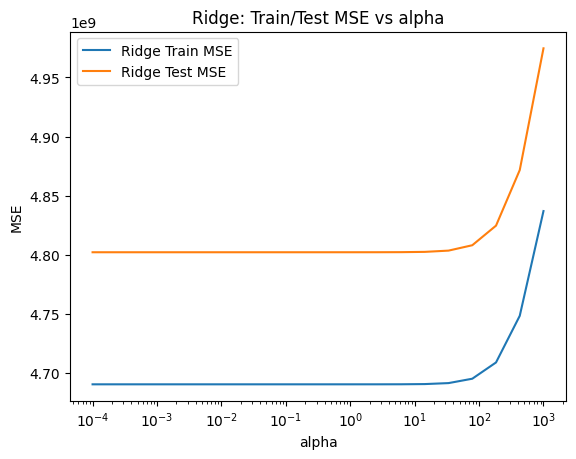

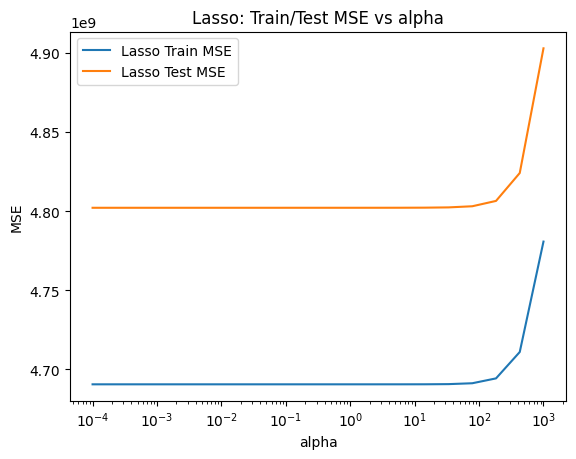

In [ ]:
# Ridge Train/Test MSE vs alpha (Ridge + Lasso)
ridge_train_list = []
ridge_test_list = []
lasso_train_list = []
lasso_test_list = []

for i in alpha_grid:
    ridge = Ridge(alpha=i).fit(X_train_scaled, Y_train)
    lasso = Lasso(alpha=i, max_iter=20000).fit(X_train_scaled, Y_train)

    ridge_train_list.append(mean_squared_error(Y_train, ridge.predict(X_train_scaled)))
    ridge_test_list.append(mean_squared_error(Y_test, ridge.predict(X_test_scaled)))

    lasso_train_list.append(mean_squared_error(Y_train, lasso.predict(X_train_scaled)))
    lasso_test_list.append(mean_squared_error(Y_test, lasso.predict(X_test_scaled)))

plt.figure()
plt.plot(alpha_grid, ridge_train_list, label="Ridge Train MSE")
plt.plot(alpha_grid, ridge_test_list, label="Ridge Test MSE")
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("Ridge: Train/Test MSE vs alpha")
plt.legend()
plt.show()

plt.figure()
plt.plot(alpha_grid, lasso_train_list, label="Lasso Train MSE")
plt.plot(alpha_grid, lasso_test_list, label="Lasso Test MSE")
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("Lasso: Train/Test MSE vs alpha")
plt.legend()
plt.show()

Part 2: Classification Task (Breast Cancer)

Task 1: Load and Split Dataset

In [12]:
# Load Breast Cancer dataset
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Classes:", np.unique(y))

X shape: (569, 30)
y shape: (569,)
Classes: [0 1]


In [13]:
#Train/Test split(80/20)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("Train:", Xc_train.shape, yc_train.shape)
print("Test:", Xc_test.shape, yc_test.shape)

Train: (455, 30) (455,)
Test: (114, 30) (114,)


In [14]:
scaler = StandardScaler()
Xc_train_scaled = scaler.fit_transform(Xc_train)
Xc_test_scaled = scaler.transform(Xc_test)

Task 2: Complete all the Task

Step 1: Baseline Model (No Regularization)

In [15]:
#Baseline Logistic Regression
log_base = LogisticRegression(max_iter=1000, solver="liblinear")
log_base.fit(Xc_train_scaled, yc_train)

train_pred = log_base.predict(Xc_train_scaled)
test_pred = log_base.predict(Xc_test_scaled)

print("Baseline Logistic Regression")
print("Train Accuracy:", accuracy_score(yc_train, train_pred))
print("Test Accuracy:", accuracy_score(yc_test, test_pred))
print("First 10 coefficients:")
print(log_base.coef_[0][:10].round(4))

Baseline Logistic Regression
Train Accuracy: 0.9868131868131869
Test Accuracy: 0.9736842105263158
First 10 coefficients:
[-0.4087 -0.3881 -0.3722 -0.4759 -0.0562  0.5529 -0.8183 -1.1305  0.2313
  0.0518]


Step 2: Hyperparameter Tuning

In [19]:
#GridSearchCV for Logistic Regression
c_grid = np.logspace(-4, 3, 15)
log_model = LogisticRegression(max_iter=8000, solver="saga")

log_gs = GridSearchCV(
    log_model,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=1
)

log_gs.fit(Xc_train_scaled, yc_train)

print("Best params:", log_gs.best_params_)
print("Best CV score:", log_gs.best_score_)

Best params: {'C': np.float64(4.641588833612772)}
Best CV score: 0.9780219780219781


In [20]:
#Evaluate best Logistic Regression
best_log = log_gs.best_estimator_

train_pred = best_log.predict(Xc_train_scaled)
test_pred = best_log.predict(Xc_test_scaled)

print("Best Logistic Regression Results")
print("Train Accuracy:", accuracy_score(Yc_train, train_pred))
print("Test Accuracy:", accuracy_score(Yc_test, test_pred))

print("\nFirst 10 coefficients:")
print(np.round(best_log.coef_.ravel()[:10], 4))

Best Logistic Regression Results
Train Accuracy: 0.9912087912087912
Test Accuracy: 0.9824561403508771

First 10 coefficients:
[-0.2505 -0.1089 -0.1497 -0.3434  0.0387  1.4411 -1.1961 -2.128   0.5931
 -0.3833]


Step 3: Regularization Experiments (L1 vs L2)

In [21]:
#Train L1 and L2 separtely using best C
best_C = log_gs.best_params_["C"]

log_l1 = LogisticRegression(max_iter=8000, solver="saga", penalty="l1", C=best_C)
log_l2 = LogisticRegression(max_iter=8000, solver="saga", penalty="l2", C=best_C)

log_l1.fit(Xc_train_scaled, yc_train)
log_l2.fit(Xc_train_scaled, yc_train)

pred_l1_train = log_l1.predict(Xc_train_scaled)
pred_l1_test = log_l1.predict(Xc_test_scaled)

pred_l2_train = log_l2.predict(Xc_train_scaled)
pred_l2_test = log_l2.predict(Xc_test_scaled)

print("L1 Logistic Regression")
print("Train Accuracy:", accuracy_score(yc_train, pred_l1_train))
print("Test Accuracy:", accuracy_score(yc_test, pred_l1_test))
print("L1 zeros:", np.sum(log_l1.coef_.ravel() == 0))

print("L2 Logistic Regression")
print("Train Accuracy:", accuracy_score(yc_train, pred_l2_train))
print("Test Accuracy:", accuracy_score(yc_test, pred_l2_test))

L1 Logistic Regression
Train Accuracy: 0.989010989010989
Test Accuracy: 0.9736842105263158
L1 zeros: 10
L2 Logistic Regression
Train Accuracy: 0.9912087912087912
Test Accuracy: 0.9824561403508771


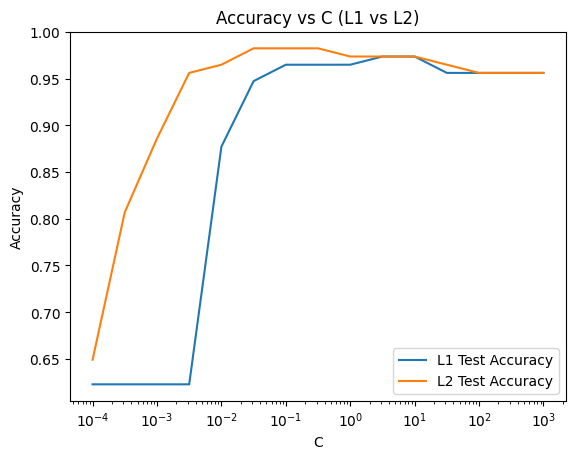

In [23]:
#Plot accuracy vs C for L1 and L2

acc_l1, acc_l2 = [],[]

for C in c_grid:
    m1 = LogisticRegression(max_iter=8000, solver="saga", penalty="l1", C=C)
    m2 = LogisticRegression(max_iter=8000, solver="saga", penalty="l2", C=C)

    m1.fit(Xc_train_scaled, yc_train)
    m2.fit(Xc_train_scaled, yc_train)

    acc_l1.append(accuracy_score(yc_test, m1.predict(Xc_test_scaled)))
    acc_l2.append(accuracy_score(yc_test, m2.predict(Xc_test_scaled)))


plt.figure()
plt.semilogx(c_grid, acc_l1, label="L1 Test Accuracy")
plt.semilogx(c_grid, acc_l2, label="L2 Test Accuracy")
plt.legend()
plt.title("Accuracy vs C (L1 vs L2)")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.show()